## Predict the nitrogen oxides levels around the city of Boston

In [2]:
import pandas as pd               #panda is a data frame library
import matplotlib.pyplot as plt   #mathplotlib.pyplot plots data
import numpy as np                #numpy provides N-dim object support

#do ploting inline instead of in a seperate window
%matplotlib inline

### Part 1: Dataset Exploration 

In [3]:
df = pd.read_csv("./Boston.csv", index_col=0)
df.shape

(506, 14)

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##### Question

What is the number of attributes in the dataset?

* A: 13
    
What is the number of observations?

* A: 506

##### Definition of features
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

|Feature	|Description	|
|-----------|---------------|
|crim	|per capita crime rate by town|
|zn	|proportion of residential land zoned for lots over 25,000 sq.ft|
|indus	|proportion of non-retail business acres per town|
|chas	|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|nox	|nitric oxides concentration (parts per 10 million)|
|rm	|average number of rooms per dwelling|
|age	|proportion of owner-occupied units built prior to 1940|
|dis	|weighted distances to five Boston employment centres|
|rad	|index of accessibility to radial highways	|
|tax	|full-value property-tax rate per $10,000	|
|ptratio|pupil-teacher ratio by town	|
|black	|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|lstat	|% lower status of the population |

|medv	|Median value of owner-occupied homes in $1000's|


##### Question
The target column (label column) of the dataset that we are interested in is called nox
(nitrogen oxides concentration in parts per 10 million). What type of variable value is this?

* A: Continues Variable

##### Check for null values

In [5]:
df.isnull().values.any()

False

##### Check correlation and if there is any then delete the correlation

In [6]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix of each pair of columns in the dataframe.
    
    Input:
        df: pandas Data Frame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                                0------------------------->1
                                                Expect a darkred line top left to bottom right
    """
    
    corr = df.corr() # data frame correlation function
    fig , ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

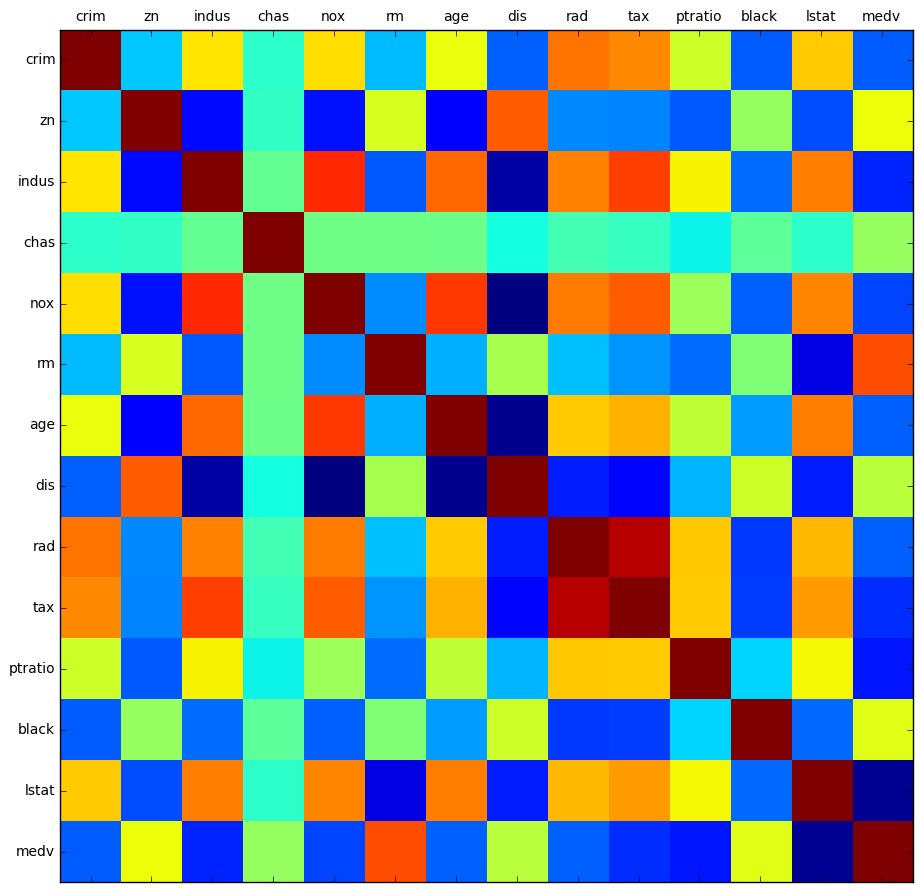

In [7]:
plot_corr(df)

In [8]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Part 2: Feature Selection

In [9]:
from sklearn.model_selection import train_test_split

feature_col_names = ['dis']
predicted_class_names = ['nox']

X = df[feature_col_names].values
y = df[predicted_class_names].values 
split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split_test_size, random_state=42)

### Part 3: Building a Polynomial Regression Model

In [10]:
from sklearn import cross_validation
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

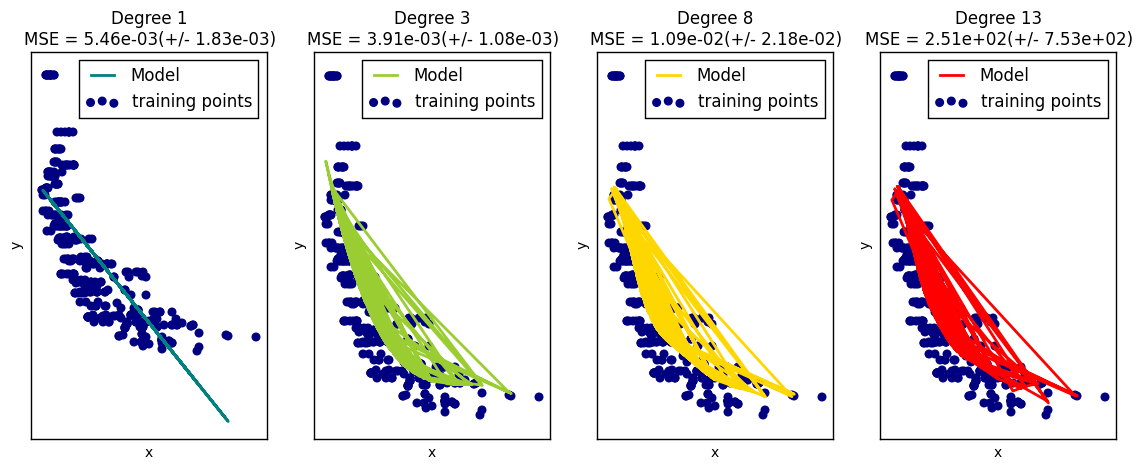

In [13]:
colors = ['teal', 'yellowgreen', 'gold', 'red']
plt.figure(figsize=(14, 5))

for count, degree in enumerate([1,3,8,13]):
    subplot = plt.subplot(1, 4, count + 1)
    plt.scatter(X_train, y_train, color='navy', s=30, marker='o', label="training points")
    plt.setp(subplot, xticks=(), yticks=())
    poly_model = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("poly_model", poly_model), ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    
    scores = cross_validation.cross_val_score(pipeline,X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    
    plt.plot(X_test, pipeline.predict(X_test), color=colors[count], linewidth=2, label="Model")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degree, -scores.mean(), scores.std()))
plt.show()
    

##### I would choose degree 8 because it has the lowest MSE errors.